# 1. **Business Understanding**

## 1.1 Overview of the South Korean Housing Market
The South Korean housing market is predominantly **characterized by apartment-style residential properties, which make up approximately 60% of all housing units in the country**<sup>[[1]](#ref1)</sup>. This preference is particularly strong in major cities, including Daegu, the fourth-largest city in South Korea, with a population of 2.4 million<sup>[[2]](#ref2)</sup>. Over the past decades, Daegu's real estate market has experienced significant growth and price fluctuations<sup>[[1]](#ref1)</sup>, highlighting the growing importance of accurate property valuation for both buyers and sellers.

**Korean households have a strong tendency to own houses not only for residential purposes but for investment as well**<sup>[[1]](#ref1)</sup>. Apartments in Korea are highly preferred as an investment because they yield high and stable profits and are highly liquid. This dual purpose of housing further emphasizes the importance of a fast and reliable property valuation.

In today's fast-paced environment, property owners often rely heavily on real estate agents for transaction guidance, primarily due to time constraints and the complexity of market analysis. Traditional property valuation methods require extensive market knowledge, consideration of numerous variables, and significant time investment to accurately assess an apartment's market value<sup>[[3]](#ref3)</sup>.


## 1.2 Digital Transformation in the Real Estate Industry
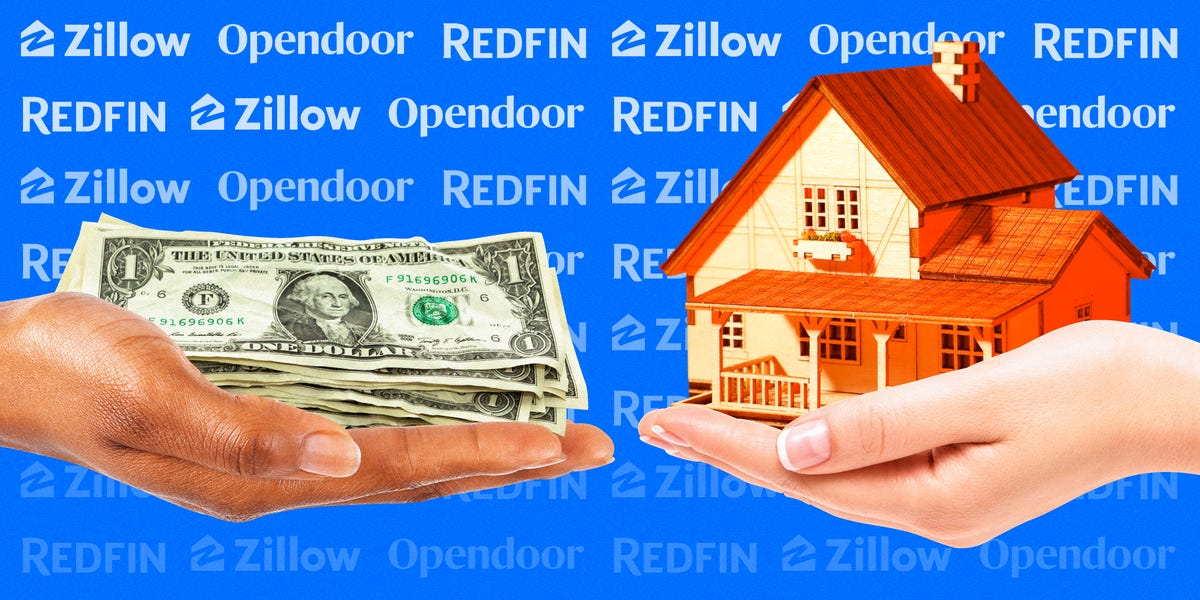

The real estate industry has undergone digital transformation in the past years, exemplified by **online platforms** like Redfin and Zillow in the United States, which provide **easy access between real estate agents and property owners**. These platforms typically allow property owners to list their apartments, connect with affiliated agents, and access market insights. Furthermore, these platforms often incorporate their own **Automated Valuation Models (AVMs) to provide initial price estimates to potential sellers before they contact agents**.

While AVMs are usually not intended to replace the nuanced, expert analysis provided by real estate professionals, real estate agents also have more benefits from AVM integration. **Sellers who proceed after seeing AVM estimates are likely to be more serious about selling, providing agents with pre-qualified leads**. For the platform itself, reliable AVMs may **increase user engagement** and **retention** while generating **higher quality leads for affiliated agents**. There's also potential for additional **revenue** streams through **premium AVM features** or reports.


However, the challenge of accurate prediction with numerous variables remains significant in the real estate market. Complex variables such as location, size, age of the building, geographic location, nearby amenities, and market trends all play crucial roles in determining an apartment's value<sup>[[3]](#ref3)</sup>. The high-stake nature of the industry demands reliability of the AVM. Furthermore, inaccurate predictions from these variables may lead to various issues:

1. If the predicted price is **lower** than the market value, **property owners may be discouraged from using the platform's services to connect with agents, potentially leading to lost business opportunities for both the platform and affiliated real estate professionals**.

2. Conversely, if the predicted price is **higher** than the market value, **it may create unrealistic expectations for the user. It may also mislead real estate agents, resulting in properties being overpriced, remaining on the market for extended periods. In either case, both could lead in dissatisfaction with the platform's services**

To address these challenges, machine learning regression models have emerged as a promising solution<sup>[[3]](#ref3)</sup>. These models can process large amounts of data simultaneously and learn from historical trends to provide fast and accurate property evaluations. By leveraging machine learning techniques, online real estate platforms may offer more reliable initial price estimates, enhancing user trust and improving the overall efficiency of the business.

## 1.3 Objective of This Work

This project aims to develop a **machine learning regression model** to **predict apartment prices in Daegu, South Korea, within the context of online real estate platforms, where automated price estimates are reshaping how property owners and agents interact**. The model will analyze historical transaction data and relevant features (variables) to provide accurate estimates for apartment prices. The ultimate goal is to create a tool that:

- Provides accurate initial price estimates for **property owners**.
- Supports **real estate agents** with data-driven insights for better decision-making.

By bridging the gap between traditional valuation methods and modern technology, this work seeks to contribute to the ongoing digital transformation of the real estate industry.


---

**References**

<a id="ref1">[1]</a> Shin, H.S., Yi, H.C. (2019). The Korean Housing Market: Its Characteristics and Policy Responses. In: Nijskens, R., Lohuis, M., Hilbers, P., Heeringa, W. (eds) Hot Property.

<a id="ref2">[2]</a> Daegu Metropolitan City. (2023). About Daegu. Retrieved from https://www.daegu.go.kr/english/index.do?menu_id=00939612

<a id="ref3">[3]</a> Matysiak, George. (2017). Automated Valuation Models (AVMs): A brave new world?

## 1.4 Data Understanding

The dataset contains information about apartment sales in Daegu region, with various features describing both the apartment units and their surroundings. The key variables can be categorized into:

1. **Property Characteristics**
   - `HallwayType`: The structural type of the apartment building
   - `YearBuilt`: Construction year of the apartment complex
   - `Size(sqf)`: Floor area of the unit in square feet

2. **Transportation Access**
   - `TimeToSubway`: Time required to travel to the nearest subway station
   - `SubwayStation`: Name of the nearest subway station within Daegu

3. **Facilities and Amenities**
   - External: 
      - `N_FacilitiesNearBy(ETC)`: Count of miscellaneous facilities in the vicinity
      - `N_FacilitiesNearBy(PublicOffice)`: Count of public offices nearby
      - `N_SchoolNearBy(University)`: Number of universities in the surrounding area
   - Internal:   
      - `N_Parkinglot(Basement)`: Number of parking spaces in the apartment's basement
      - `N_FacilitiesInApt`: Count of facilities within the apartment complex

4. **Target Variable**
   - `SalePrice`: Price of the apartment unit in Korean Won

## 1.5 Evaluation Metrics
To assess the performance of the regression models for predicting apartment prices in Daegu, this work will employ three widely-used evaluation metrics: Root Mean Square Error (**RMSE**), Mean Absolute Error (**MAE**), and Mean Absolute Percentage Error (**MAPE**). Among these, **MAE will be chosen as the objective metric to minimize during hyperparameter tuning**. 

### Root Mean Square Error (RMSE)

$$ \text{RMSE} = \sqrt{\frac{\displaystyle\sum_{i=0}^{n-1} (y_\text{actual}[i] - y_\text{predict}[i])^2}{n}}$$

RMSE is a scale-dependent metric that maintains the same unit as the target variable. While widely used, RMSE has several limitations for this problem. Due to the squared term in its formula, RMSE tends to penalize large errors more heavily than small ones, making it particularly **sensitive to outliers<sup>[[4]](#ref4)</sup>**. This characteristic often leads models to focus on **minimizing large errors at the expense of overall prediction accuracy<sup>[[6]](#ref6)</sup>**. Additionally, **minimizing RMSE pushes predictions toward the mean of the target variable<sup>[[4]](#ref4)[[5]](#ref5)</sup>**, which may **not** be **optimal for housing price data** where price distributions are typically skewed.

### **Mean Absolute Error (MAE)**

$$ \text{MAE} = \frac{\displaystyle\sum_{i=0}^{n-1} \left| y_\text{actual}[i] - y_\text{predict}[i] \right|}{n} $$

MAE, like RMSE, is expressed in the same units as the target variable but offers more straightforward interpretation as the average absolute difference between predicted and actual values. Since it uses absolute differences rather than squared errors, **MAE is more robust against outliers<sup>[[4]](#ref4)</sup>, making it particularly suitable for housing price prediction where outliers are common**. Furthermore, **minimizing MAE drives predictions toward the median of the target variable<sup>[[4]](#ref4)[[5]](#ref5)</sup>**, which is more appropriate for **skewed distributions typically found in housing prices**. For these reasons, MAE will be the primary optimization metric for hyperparameter tuning in this study.

### Mean Absolute Percentage Error (MAPE)

$$ \text{MAPE} = \frac{\displaystyle\sum_{i=0}^{n-1} \left| \frac{y_\text{actual}[i] - y_\text{predict}[i]}{y_\text{actual}[i]}\right|}{n}\cdot100\% $$

Unlike RMSE and MAE, **MAPE is scale-independent and expresses errors as percentages<sup>[[5]](#ref5)</sup>**, making it more **accessible to both technical and non-technical stakeholders**. However, MAPE has notable limitations: its terms become **undefined when actual values are zero<sup>[[5]](#ref5)</sup>** and can be **disproportionately large for small target values due to the division by the actual target value<sup>[[5]](#ref5)</sup>**. While zero prices are not a concern in housing price prediction, the impact of small values on its terms' denominator means that minimizing MAPE might lead to models that are accurate on low-priced apartments, but perform poorly on higher-priced apartments.


<br>

**Given these considerations, MAE will serve as the primary evaluation metric for model tuning and selection, with MAPE as an evaluation metric to provide interpretable results for stakeholders.** While RMSE is given a lower priority, it still offers valuable insights in this work. RMSE can be used to evaluate a model's sensitivity to outliers, with lower values indicating smaller errors around extreme data points, if present.

<br>

---

**References**

<a id="ref4">[4]</a> Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd ed.). Springer.

<a id="ref5">[5]</a> Hyndman, R.J., & Athanasopoulos, G. (2018). Accuracy measures. In Forecasting: Principles and Practice (2nd ed.). Retrieved from https://otexts.com/fpp2/accuracy.html

<a id="ref6">[6]</a> Nahhas, R.W. (2021). Introduction to Regression Methods for Public Health using R. Chapter 5.21: Multiple Linear Regression: Outliers. Retrieved from https://www.bookdown.org/rwnahhas/RMPH/mlr-outliers.html

# **2. Data Cleaning and Exploratory Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1 Overview

In [2]:
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
pd.DataFrame({
    'total': df.shape[0],
    'null_count': df.isna().sum(),
    'null_pct':   [f"{val:.2f}%" for val in (df.isna().sum() / df.shape[0] * 100)],
    'unique_count': df.nunique(),
    'dtype': df.dtypes
}).rename_axis('column')

,total,null_count,null_pct,unique_count,dtype
column,,,,,
HallwayType,4123,0,0.00%,3,object
TimeToSubway,4123,0,0.00%,5,object
SubwayStation,4123,0,0.00%,8,object
N_FacilitiesNearBy(ETC),4123,0,0.00%,4,float64
N_FacilitiesNearBy(PublicOffice),4123,0,0.00%,8,float64
N_SchoolNearBy(University),4123,0,0.00%,6,float64
N_Parkinglot(Basement),4123,0,0.00%,20,float64
YearBuilt,4123,0,0.00%,16,int64
N_FacilitiesInApt,4123,0,0.00%,9,int64


<br>

**There are no null values in the dataset**.

## 2.2 Converting Facility Features into Correct Data Types
Since `N_FacilitiesNearBy(ETC)`, `N_FacilitiesNearBy(PublicOffice)`, `N_SchoolNearBy(University)`, and `N_Parkinglot(Basement)` should only have discrete values, these variables will be converted into integers.

In [4]:
facility_cols_to_integers = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)']
df[facility_cols_to_integers] = df[facility_cols_to_integers].astype('int64')

pd.DataFrame({
    'total': df.shape[0],
    'null_count': df.isna().sum(),
    'null_pct':   [f"{val:.2f}%" for val in (df.isna().sum() / df.shape[0] * 100)],
    'unique_count': df.nunique(),
    'dtype': df.dtypes
}).rename_axis('column')

,total,null_count,null_pct,unique_count,dtype
column,,,,,
HallwayType,4123,0,0.00%,3,object
TimeToSubway,4123,0,0.00%,5,object
SubwayStation,4123,0,0.00%,8,object
N_FacilitiesNearBy(ETC),4123,0,0.00%,4,int64
N_FacilitiesNearBy(PublicOffice),4123,0,0.00%,8,int64
N_SchoolNearBy(University),4123,0,0.00%,6,int64
N_Parkinglot(Basement),4123,0,0.00%,20,int64
YearBuilt,4123,0,0.00%,16,int64
N_FacilitiesInApt,4123,0,0.00%,9,int64


## 2.3 Handling Duplicates

**Duplicated rows will be removed** to ensure the reliability of the model and to avoid bias and overfitting. 

In [5]:
initial_data_size = df.shape[0]
n_duplicate_rows_before = df.duplicated().sum()
print(f"There are {n_duplicate_rows_before} duplicated rows in the dataset before removal.")
## Remove the duplicates
df.drop_duplicates(inplace=True)
print(f"There are {df.duplicated().sum()} duplicated rows in the dataset after removal.")
## Print percent data removed
print(f"{n_duplicate_rows_before/initial_data_size*100:.2f} % of the original data are removed for being duplicates.")
## Print data summary after duplicate removal
pd.DataFrame({
    'total': df.shape[0],
    'null_count': df.isna().sum(),
    'null_pct':   [f"{val:.2f}%" for val in (df.isna().sum() / df.shape[0] * 100)],
    'unique_count': df.nunique(),
    'dtype': df.dtypes
}).rename_axis('column')

There are 1422 duplicated rows in the dataset before removal.
There are 0 duplicated rows in the dataset after removal.
34.49 % of the original data are removed for being duplicates.


,total,null_count,null_pct,unique_count,dtype
column,,,,,
HallwayType,2701,0,0.00%,3,object
TimeToSubway,2701,0,0.00%,5,object
SubwayStation,2701,0,0.00%,8,object
N_FacilitiesNearBy(ETC),2701,0,0.00%,4,int64
N_FacilitiesNearBy(PublicOffice),2701,0,0.00%,8,int64
N_SchoolNearBy(University),2701,0,0.00%,6,int64
N_Parkinglot(Basement),2701,0,0.00%,20,int64
YearBuilt,2701,0,0.00%,16,int64
N_FacilitiesInApt,2701,0,0.00%,9,int64


## 2.4 Distribution of Categorical Variables

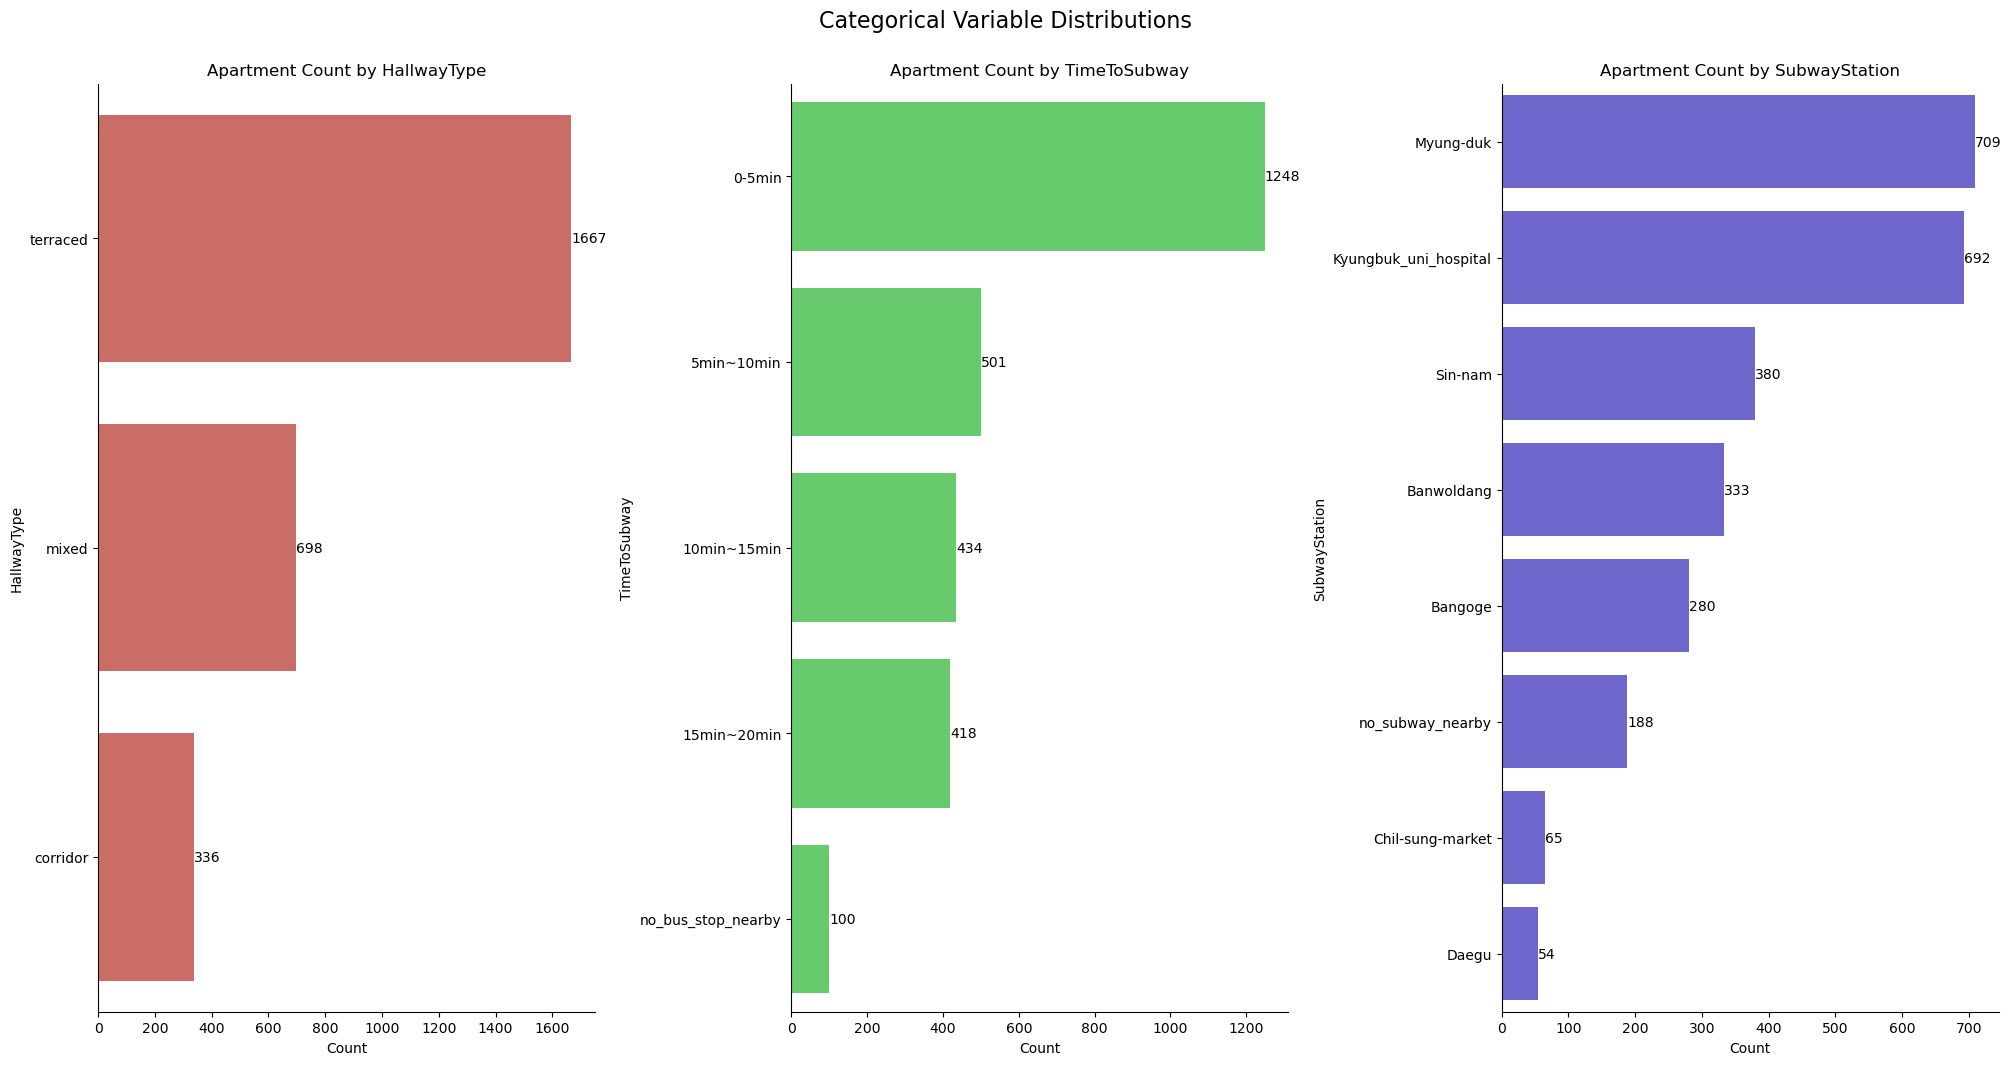

In [6]:
object_cols = df.select_dtypes(include=['object']).columns

## Increase figure size and adjust spacing
fig, ax = plt.subplots(1, object_cols.shape[0], figsize=(20, 10), constrained_layout=True)

## Color palette
colors = sns.color_palette("hls", len(object_cols))

for i, colname in enumerate(object_cols):        
    sns.countplot(data=df, y=colname, ax=ax[i], color=colors[i], 
                  order=df[colname].value_counts().index)
    
    ## Add value labels with improved formatting
    for j, bar in enumerate(ax[i].patches):
        width = bar.get_width()
        ax[i].text(width, bar.get_y() + bar.get_height()/2,
                   f'{width:.0f}',
                   va='center', ha='left')
    
    ## Customize axes
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    
    ## Set labels
    ax[i].set_title(f'Apartment Count by {colname}')
    ax[i].set_xlabel('Count', fontsize=10)
    ax[i].set_ylabel(colname, fontsize=10)

## Suptitle
plt.suptitle('Categorical Variable Distributions', fontsize=16, y=1.05)

plt.show()

It can be seen that the **categorical variables tend to be not distributed evenly**: 

- Some types of apartment are more common than the others. 

- Many apartments have varied time to walk to the nearest subway. 

- Some subway stations have more apartments nearby than other subway stations.

## 2.5 Distribution of Numerical Data and Anomalous Data Removal

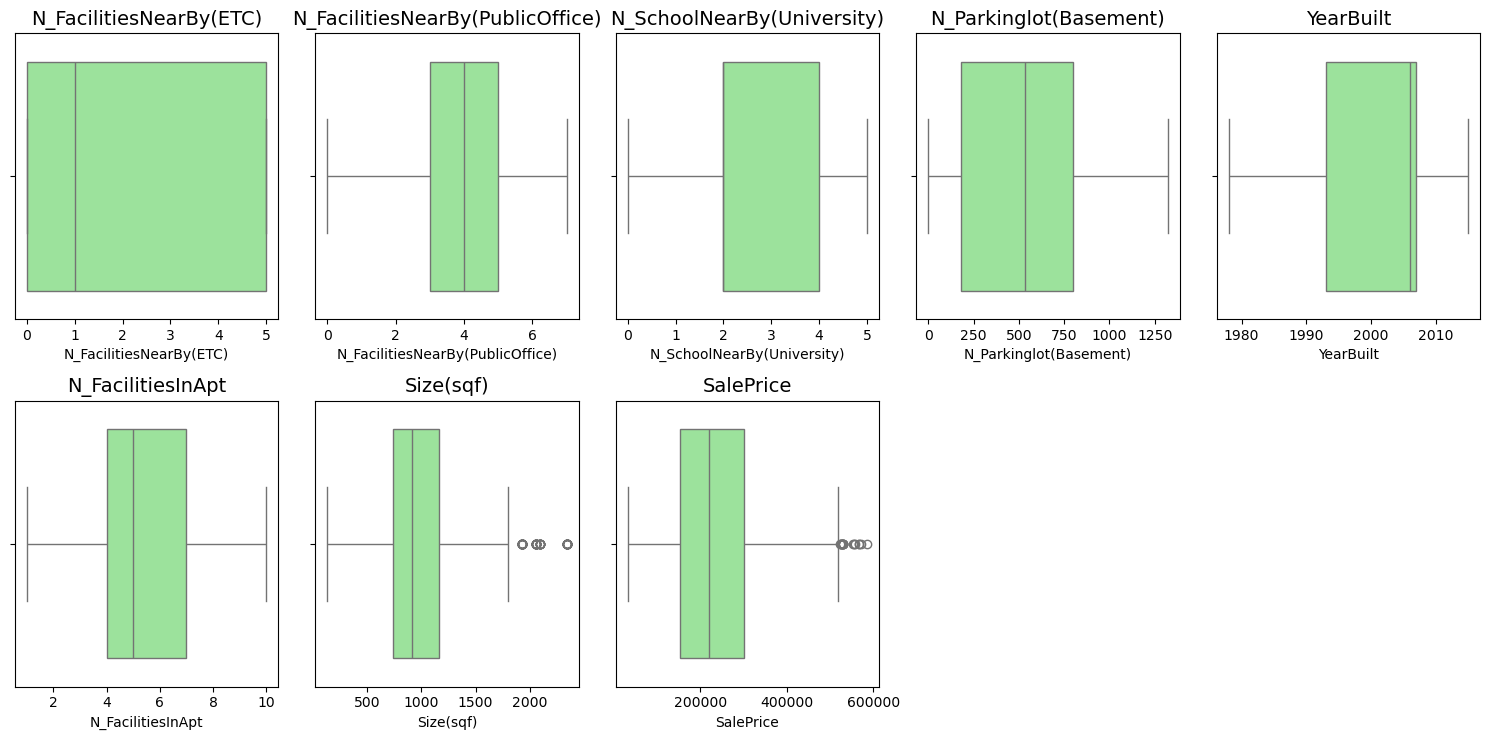

In [7]:
numerical_cols = df.select_dtypes(include=['number']).columns
num_cols = 5
num_rows = int(np.ceil(len(numerical_cols) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 7.5))


axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], color='lightgreen')
    axes[i].set_title(col, fontsize=14)

        
for ax in axes[len(numerical_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

The distribution of `Size(sqf)` and `SalePrice` shows the presence of some outliers. Most of these **outliers are densely clustered**, suggesting an **underlying pattern** that could be important for the model's predictions. Therefore, **removing all of them might negatively impact the model's performance, particularly around these densely packed regions**.

However, upon closer inspection, data points where `Size(sqf)` ≈ 2300 appear to be more separated from the rest of the densely packed outliers in `Size(sqf)`. These anomalous data points represent only 0.89% of the total dataset, as shown in the results below. While minimizing the Mean Absolute Error (MAE) can make a model more robust to outliers, it is not entirely immune to the influence of anomalous data points.

Considering these factors, rows where `Size(sqf)` is greater than or equal to 2300 will be removed from the dataset to enhance the model's performance and reliability.

In [8]:
data_size_after_duplicate_removal = df.shape[0]

(df.query("`Size(sqf)` > 1700")['Size(sqf)'].value_counts() / data_size_after_duplicate_removal *  100)\
    .round(2)\
    .reset_index()\
    .rename(columns={'count':'% From Total Data'})

,Size(sqf),% From Total Data
0,1928,1.07
1,1743,0.96
2,1761,0.96
3,2337,0.89
4,2056,0.85
5,1796,0.48
6,2092,0.30


In [9]:
df.query("`Size(sqf)` > 2300")['SalePrice'].describe()

count        24.000000
mean     243536.333333
std       51855.617334
min      176991.000000
25%      202322.250000
50%      226548.000000
75%      281243.000000
max      353982.000000
Name: SalePrice, dtype: float64

In [10]:
n_anomalous_rows = df.query("`Size(sqf)` > 2300").shape[0]

print(f"There are {n_anomalous_rows} anomalous rows in the dataset before removal.")

df = df.query("`Size(sqf)` <= 2300")

print(f"There are {df.query("`Size(sqf)` > 2300").shape[0]} anomalous rows in the dataset after removal.")

print(f"{n_anomalous_rows/data_size_after_duplicate_removal*100:.2f} % of the dataset are removed for being anomalous.")

display(pd.DataFrame({
    'total': df.shape[0],
    'null_count': df.isna().sum(),
    'null_pct':   [f"{val:.2f}%" for val in (df.isna().sum() / df.shape[0] * 100)],
    'unique_count': df.nunique(),
    'dtype': df.dtypes
}).rename_axis('column'))


(df.query("`Size(sqf)` > 1700")['Size(sqf)'].value_counts() / data_size_after_duplicate_removal *  100)\
    .round(2)\
    .reset_index()\
    .rename(columns={'count':'% From Total Data'})

There are 24 anomalous rows in the dataset before removal.
There are 0 anomalous rows in the dataset after removal.
0.89 % of the dataset are removed for being anomalous.


,total,null_count,null_pct,unique_count,dtype
column,,,,,
HallwayType,2677,0,0.00%,3,object
TimeToSubway,2677,0,0.00%,5,object
SubwayStation,2677,0,0.00%,8,object
N_FacilitiesNearBy(ETC),2677,0,0.00%,4,int64
N_FacilitiesNearBy(PublicOffice),2677,0,0.00%,8,int64
N_SchoolNearBy(University),2677,0,0.00%,6,int64
N_Parkinglot(Basement),2677,0,0.00%,20,int64
YearBuilt,2677,0,0.00%,16,int64
N_FacilitiesInApt,2677,0,0.00%,9,int64


,Size(sqf),% From Total Data
0,1928,1.07
1,1743,0.96
2,1761,0.96
3,2056,0.85
4,1796,0.48
5,2092,0.30


### Distribution of SalePrice

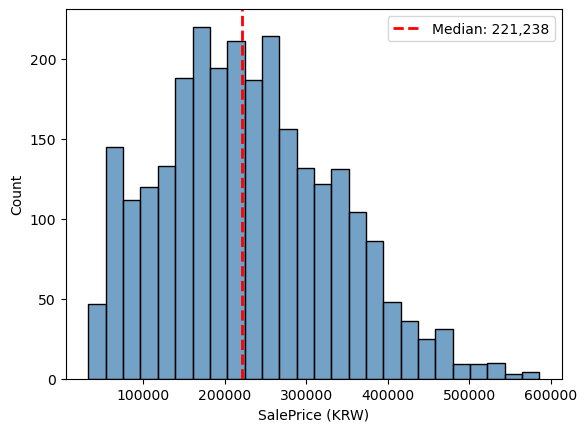

In [11]:
sns.histplot(df['SalePrice'], color='steelblue')
plt.xlabel("SalePrice (KRW)")
plt.axvline(df['SalePrice'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df['SalePrice'].median():,.0f}')
plt.legend()
plt.show()

In [12]:
df['SalePrice'].skew()

0.38771143704703676

From the previous charts, it is evident that **many numerical variables in the dataset exhibit non-normal distributions**. Furthermore, the target variable `SalePrice` displays a right-skewed distribution. This skewness of `SalePrice` suggests that Mean Absolute Error (MAE) would be the most appropriate metric to minimize when optimizing the regression model's performance.

## 2.6 Correlation of Numeric Variables

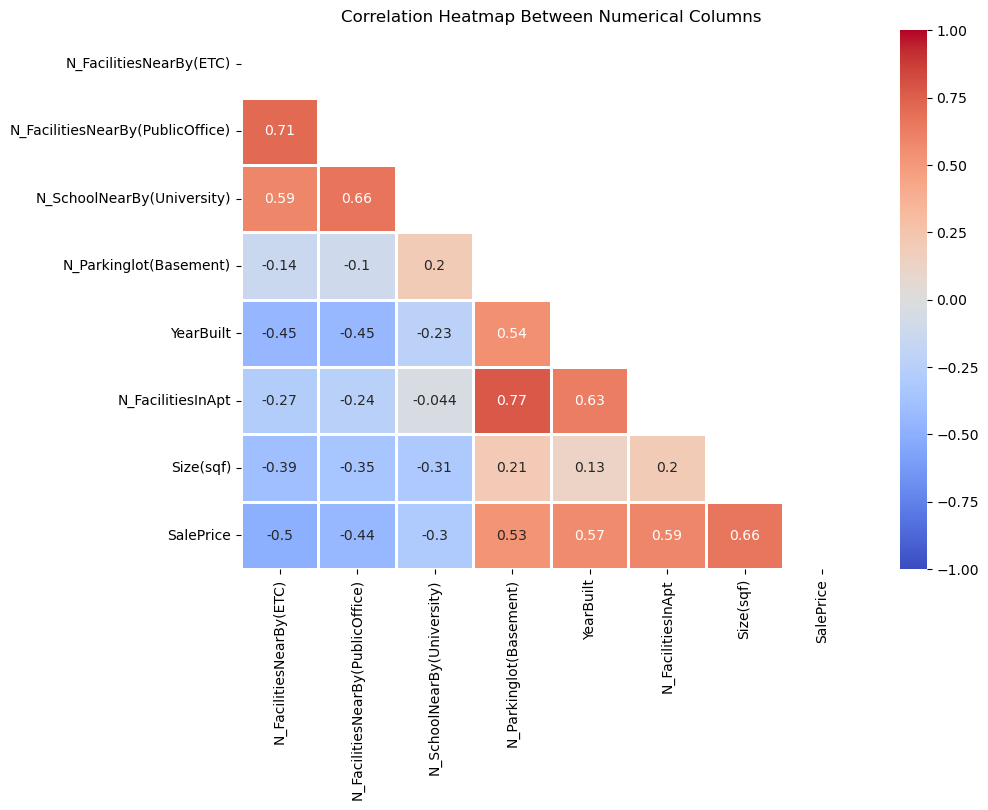

In [13]:
plt.figure(figsize=(10,7))
corr_df = df.corr(numeric_only=True, method='spearman') # Most numerical columns are not normally distributed (see prev. section)
mask_for_corr = np.ones_like(corr_df,dtype='bool')
mask_for_corr = np.triu(mask_for_corr) # Set elements of the upper triangle to zeroes (s.t. it's not displayed)

sns.heatmap(corr_df, vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask_for_corr, annot=True, linecolor='white', linewidth=1)
plt.xticks(rotation=90)
plt.title("Correlation Heatmap Between Numerical Columns")
plt.show()

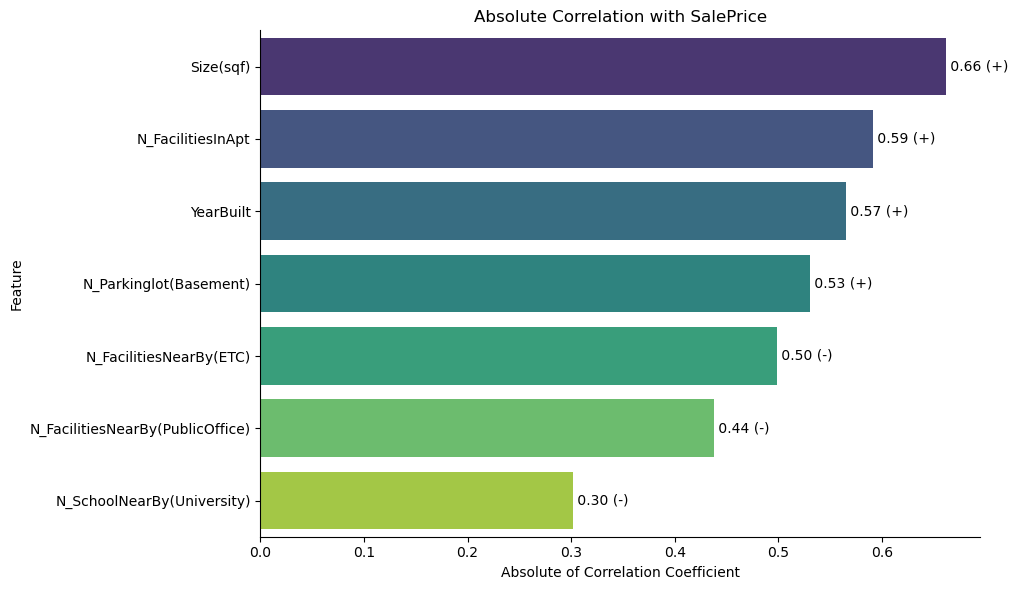

In [14]:
numeric_corr_with_saleprice = df[numerical_cols].drop(columns='SalePrice').corrwith(df['SalePrice'], method='spearman')
absolute_numeric_corr_with_saleprice = np.abs(numeric_corr_with_saleprice).sort_values(ascending=False)
numeric_corr_with_saleprice = numeric_corr_with_saleprice.reindex(absolute_numeric_corr_with_saleprice.index)
absolute_numeric_corr_with_saleprice = absolute_numeric_corr_with_saleprice.reset_index().rename(columns={'index': 'Feature', 0:'Absolute of Correlation'})

plt.figure(figsize=(10, 6))
sns.barplot(data=absolute_numeric_corr_with_saleprice,
            y='Feature',
            x='Absolute of Correlation',
            hue='Feature',
            palette='viridis')

plt.title('Absolute Correlation with SalePrice')
plt.xlabel('Absolute of Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()

## Add value labels to the end of each bar
for i, v in enumerate(absolute_numeric_corr_with_saleprice['Absolute of Correlation']):
    plt.text(v, i, f' {v:.2f} ({'+' if numeric_corr_with_saleprice.iloc[i] >= 0 else '-'})', va='center')

## Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

Several observations can be made from the two charts:
- **Numerical Property Variables** (`YearBuilt` and `Size(sqf)`) and **Internal Facility Variables** (`N_FacilitiesInApt` and `N_Parkinglot(Basement)`) tend to have **moderate to strong** ($\geq 0.5$) **positive correlation** with the target variable (`SalePrice`).

- **External Facility Variables** (`N_FacilitiesNearBy(ETC)`, `N_FacilitiesNearBy(PublicOffice)`, and `N_SchoolNearBy(University)`) tend to have **weak to moderate** ($ \leq 0.5$) **negative correlation** with the target variable (`SalePrice`).

- **Internal Facility Variables** (`N_FacilitiesInApt` and `N_Parkinglot(Basement)`) are strongly correlated positively with each other ($\text{corr} = 0.77$)

- **External Facility Variables** (`N_FacilitiesNearBy(ETC)`, `N_FacilitiesNearBy(PublicOffice)`, and `N_SchoolNearBy(University)`) tend to have strong positive correlation with each other and **weak correlation with Internal Facility Variables**.

**NOTE**:
- While proximity to public facilities (e.g., government offices, universities) is generally convenient, these areas may not always be associated with high-end residential neighborhoods. Apartments near universities, for example, may cater more to students rather than wealthy buyers, which could reduce their sale price.

- Apartments with more internal facilities (e.g. gyms) are often a part of well-planned residential complexes that also include ample parking. Developers often build these features together to target affluent buyers.

## 2.7 Hallway Type

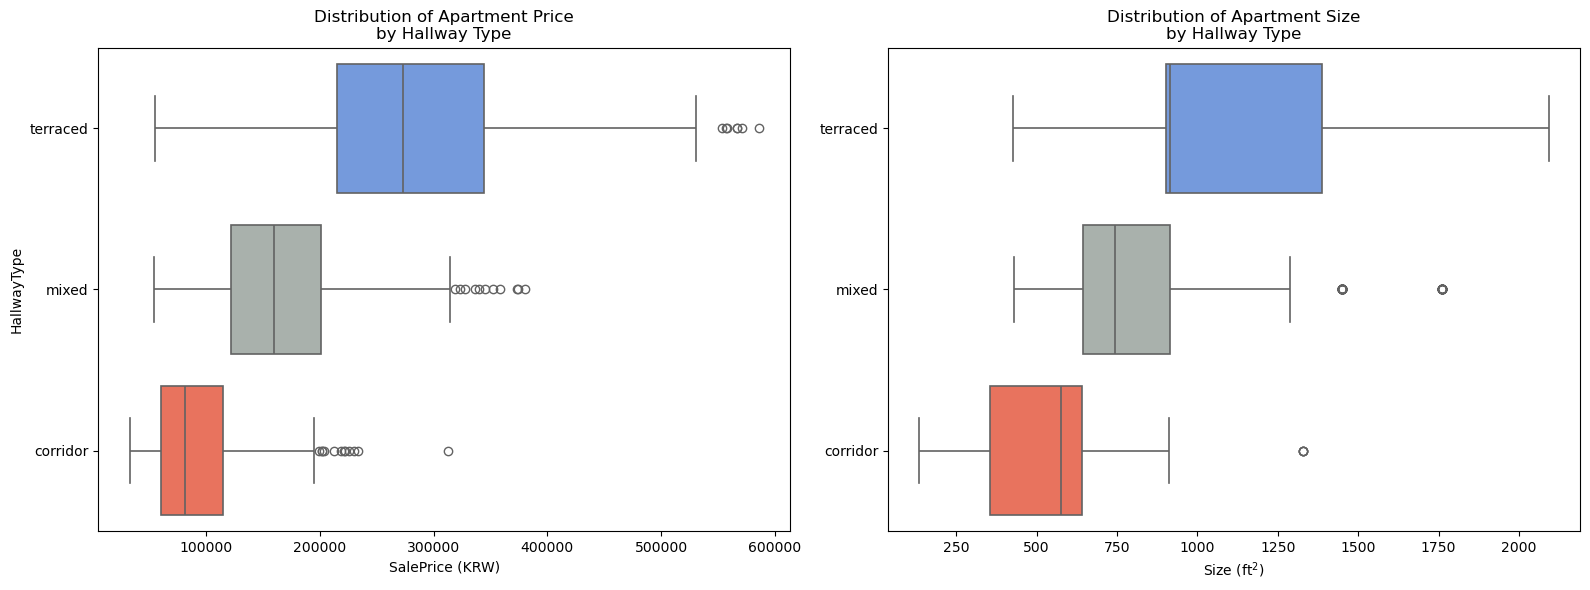

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, y='HallwayType', x='SalePrice', hue='HallwayType', ax=ax[0], palette={'corridor':'tomato', 'mixed':'#A8B2AC', 'terraced':'cornflowerblue'},linewidth=1.2)

ax[0].set_title("Distribution of Apartment Price\nby Hallway Type")
ax[0].set_xlabel("SalePrice (KRW)")
ax[0].set_ylabel("HallwayType")

sns.boxplot(data=df, y='HallwayType', x='Size(sqf)', hue='HallwayType',ax=ax[1], palette={'corridor':'tomato', 'mixed':'#A8B2AC', 'terraced':'cornflowerblue'},linewidth=1.2)
ax[1].set_title("Distribution of Apartment Size\nby Hallway Type")
ax[1].set_ylabel("")
ax[1].set_xlabel("Size (ft$^2$)")
plt.tight_layout()
plt.show()

From the chart above, there appears to be an ordered relation between `HallwayType` and `SalePrice`:
- Terraced apartments tend to be the most expensive and spacious, with higher median prices and larger sizes compared to other types, as well as great variability in both metrics.

- Mixed apartments fall in the mid-range for both price and size, offering a balance between affordability and space.

- Corridor apartments tend to be the smallest and cheapest out of the three, with a compact size and narrow price distribution.

These patterns align with the previously established positive correlation ($\text{corr}=0.65$) between `Size(sqf)` and `SalePrice`.

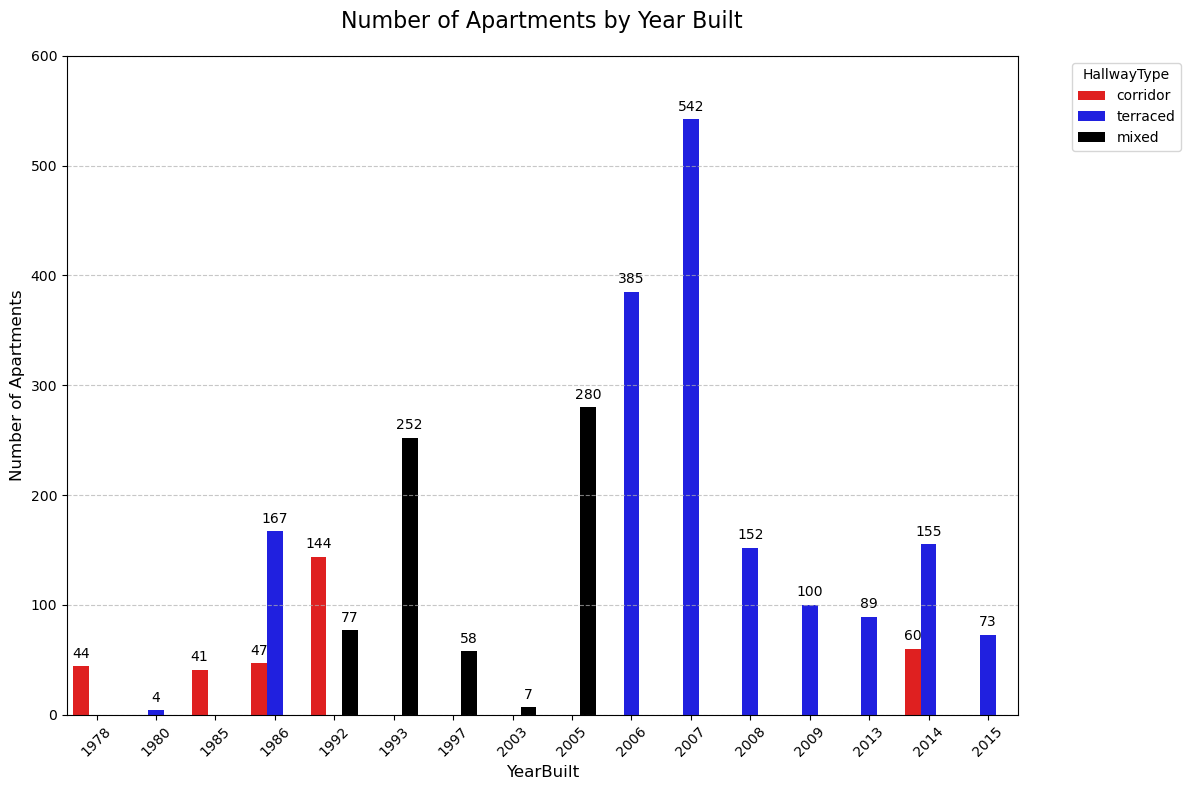

In [16]:
plt.figure(figsize=(12, 8))

## Create the countplot
ax = sns.countplot(data=df, x='YearBuilt', hue='HallwayType', palette={'corridor':'red', 'mixed':'black', 'terraced':'blue'})

## Customize the plot
plt.title('Number of Apartments by Year Built', fontsize=16, pad=20)
plt.xlabel('YearBuilt', fontsize=12)
plt.ylabel('Number of Apartments', fontsize=12)

## Rotate x-axis labels vertically and adjust their position
plt.xticks(rotation=45, ha='center')

## Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

## Adjust y-axis
plt.ylim(0, 600)
plt.yticks(range(0, 601, 100))

## Move legend outside of plot area
plt.legend(title='HallwayType', bbox_to_anchor=(1.05, 1), loc='upper left')

## Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label bars taller than 0 to avoid clutter
        ax.text(p.get_x() + p.get_width()/2., height + 5,
                f'{height:.0f}', ha='center', va='bottom')

## Adjust layout to prevent cutting off labels
plt.tight_layout()

# plt.gca().spines['top'].set_visible(False)


## Show the plot
plt.show()

Note how **terraced units tend to be newer, corridor-types tend to be from earlier periods, and mixed-types fall in between**. **Newer** apartments tend to have larger sizes (`Size(sqf)`), and **more internal facilities** like parking lots and amenities (see table below). These modern features increase the desirability and market value of a property, leading to a higher `SalePrice`. 

In [17]:
display(df.groupby("HallwayType")[['N_FacilitiesInApt', 'N_Parkinglot(Basement)', 'Size(sqf)']]
    .median()
    .rename(columns={'N_FacilitiesInApt': 'Median\nN_FacilitiesInApt', 'N_Parkinglot(Basement)':'Median\nN_Parkinglot(Basement)', 'Size(sqf)': 'Median\nSize(sqf)'})
    .style.format("{:.1f}")  ## Formats to 1 decimal place
    .set_table_styles([{'selector': 'th', 'props': [('white-space', 'pre-wrap')]}])
)

,Median N_FacilitiesInApt,Median N_Parkinglot(Basement),Median Size(sqf)
HallwayType,,,
corridor,3.0,0.0,576.0
mixed,5.0,536.0,743.0
terraced,5.0,536.0,914.0


Given these insights, `HallwayType` will be **treated as an ordinal categorical variable**. Appropriate feature engineering techniques will be applied in the subsequent preprocessing and feature engineering phase to leverage this ordinal nature.

# 3. **Train-Test Split**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X, y = df.drop(columns='SalePrice'), df['SalePrice']
display(X)
display(y)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387
1,terraced,10min~15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914
2,mixed,15min~20min,Chil-sung-market,1,7,3,56,1997,5,558
3,mixed,5min~10min,Bangoge,5,5,4,798,2005,7,914
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743
...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,818
4117,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1761
4118,terraced,0-5min,Sin-nam,0,3,2,475,2008,8,914
4119,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1451


0       346017
1       150442
2        61946
3       165486
4       311504
         ...  
4116    290265
4117    345132
4118    323008
4119    242477
4121     73451
Name: SalePrice, Length: 2677, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

# 4. **Preprocessing and Feature Engineering**

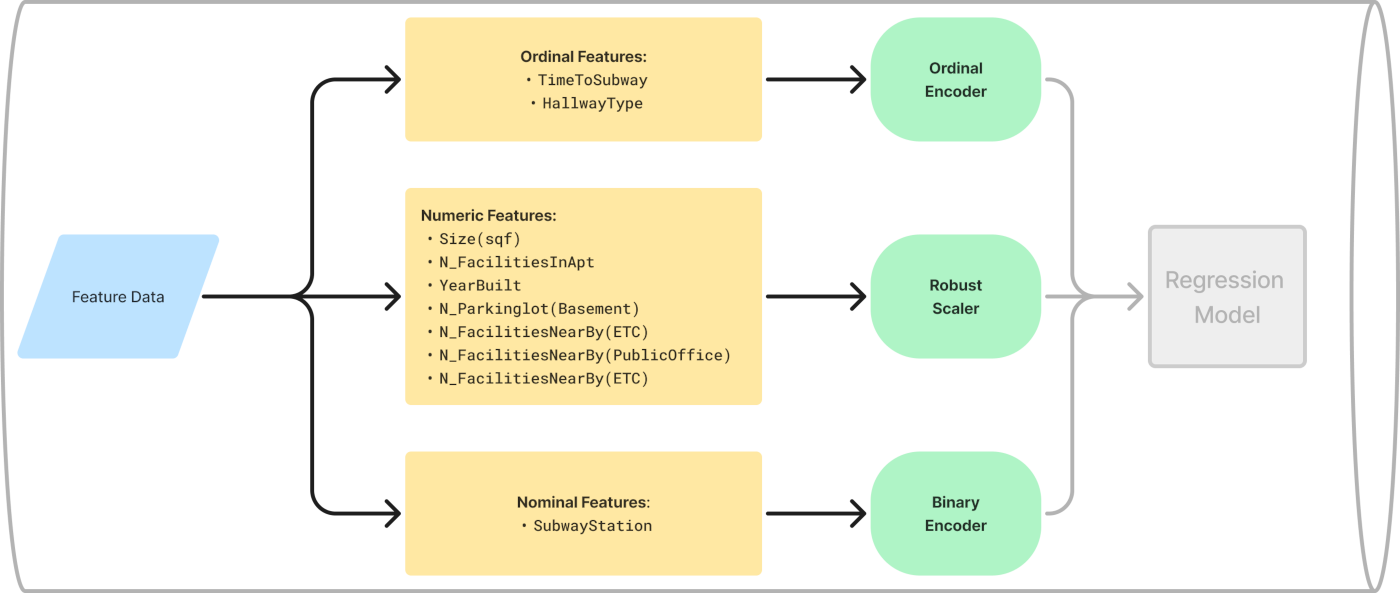

In [21]:
from sklearn.preprocessing import RobustScaler
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
display(df['TimeToSubway'].unique())
display(df['HallwayType'].unique())
display(df['SubwayStation'].unique())

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

array(['terraced', 'mixed', 'corridor'], dtype=object)

array(['Kyungbuk_uni_hospital', 'Chil-sung-market', 'Bangoge', 'Sin-nam',
       'Banwoldang', 'no_subway_nearby', 'Myung-duk', 'Daegu'],
      dtype=object)

In [23]:
ordinal_encoding_maps = [
    {
    'col': 'TimeToSubway',
    'mapping': {
        'no_bus_stop_nearby': 1,
        '15min~20min':2,
        '10min~15min':3,
        '5min~10min':4,
        '0-5min':5
    }
},
    {
    'col': 'HallwayType',
    'mapping': {
        'corridor': 1,
        'mixed': 2,
        'terraced':3
    }
}]

ordinal_encoding_maps

[{'col': 'TimeToSubway',
  'mapping': {'no_bus_stop_nearby': 1,
   '15min~20min': 2,
   '10min~15min': 3,
   '5min~10min': 4,
   '0-5min': 5}},
 {'col': 'HallwayType', 'mapping': {'corridor': 1, 'mixed': 2, 'terraced': 3}}]

In [24]:
transformer = ColumnTransformer([
    ('ordinal', OrdinalEncoder(cols=['TimeToSubway', 'HallwayType'], mapping=ordinal_encoding_maps), ['TimeToSubway', 'HallwayType']),
    ('binary', BinaryEncoder(), ['SubwayStation']),
    ('robust', RobustScaler(), X.select_dtypes(include=['number']).columns)
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(cols=['TimeToSubway',
                                                      'HallwayType'],
                                                mapping=[{'col': 'TimeToSubway',
                                                          'data_type': dtype('O'),
                                                          'mapping': no_bus_stop_nearby    1
15min~20min           2
10min~15min           3
5min~10min            4
0-5min                5
dtype: int64},
                                                         {'col': 'HallwayType',
                                                          'data_type': dtype('O'),
                                                          'mapping': corridor    1
mixed       2
terraced    3
dtype: int64}]),
                                 ['TimeToSubway', 'HallwayType']),
                                ('binary', BinaryEncoder(), ['SubwayStation']),
                                ('robust', RobustScaler(),
                                 Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object'))])

**NOTE:**
- `OrdinalEncoder` is used to convert categorical data with an order into numerical values.
- `BinaryEncoder` is preferred over `OneHotEncoder` for the `SubwayStation` feature. With eight categories, `BinaryEncoder` creates fewer new features (4) compared to `OneHotEncoder` (7), resulting in a more compact representation.

- `RobustScaler` is employed to normalize the numerical features for two reasons:
  1. It brings all numerical features to a comparable scale.
  2. It is particularly effective for handling skewed distributions, which are prevalent in most of the numerical features.


# 5. **Model Selection**

Four models are selected for evaluation, categorized as follows:

### **Standalone Models**
1. **Linear-based**:  
   - **Ridge Regression**  
     Ridge regression is chosen over simple linear models and Lasso because it is more robust to outliers and inherently handles multicollinearity by penalizing large coefficients (regularization), making additional checks for collinearity (e.g., VIF) unnecessary.  

2. **Tree-based**:  
   - **Decision Tree Regressor**  
     Decision trees are selected for their ability to model complex, non-linear relationships between features and the target variable. They perform well on small to moderately sized datasets with clear patterns and are simple to interpret. Additionally, tree-based models provide built-in feature importance metrics, aiding in feature evaluation. However, decision trees are prone to overfitting, especially on noisy data, unless appropriately pruned or regularized.

### **Ensemble Models**
Ensemble models combine multiple individual models to generate predictions, reducing the impact of outliers and improving overall accuracy.

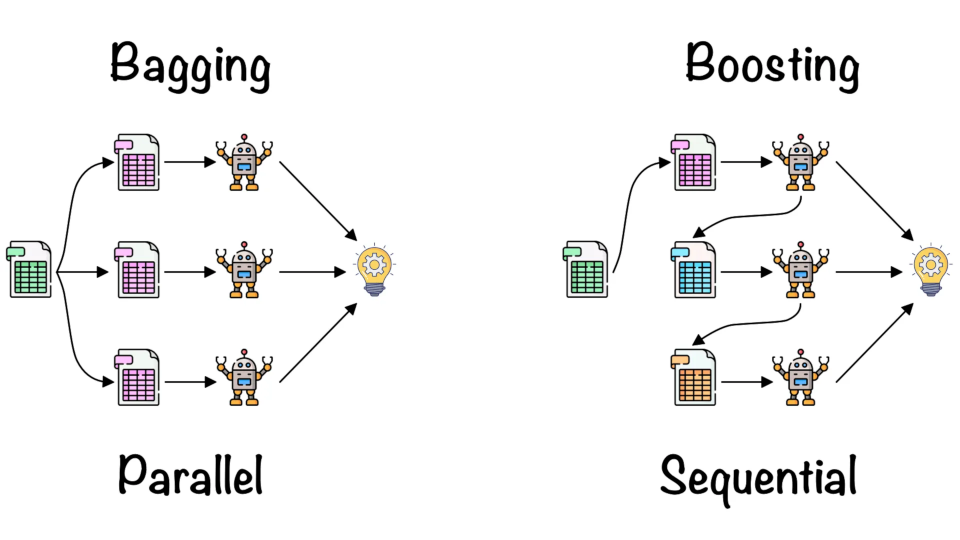

1. **Bagging**:  
   - **Random Forest Regressor**  
     Random forests build upon the concept of bagging by using decision trees as base learners. In bagging, training data is split into multiple bootstrap samples (sampled with replacement), and each sample is used to train an independent model. The final prediction is determined by aggregating the outputs (e.g., majority voting or averaging).

     Random forests further introduce randomness by selecting a random subset of features for each tree, reducing correlation between trees and improving overall performance. This helps address the issue of similar trees that may arise when using only bagging.

2. **Boosting**:  
   - **XGBoost Regressor**  
     XGBoost is a boosting algorithm that trains weak models sequentially, with each iteration correcting the errors of the previous model. It uses tree-based models as base learners and optimizes the fitting process by minimizing a loss function via gradient descent. XGBoost is highly efficient, optimized for speed, and includes several useful features such as built-in handling of missing values and cross-validation. Like other tree-based models, it also provides feature importance metrics.

---

### **Why These Models Were Chosen**
- **Standalone Models**:
    
    - **Ridge Regression**: Ridge regression is selected because it is more robust to outliers compared to Lasso. This is due to its L2 regularization, which penalizes large coefficients without completely eliminating features. Additionally, Ridge inherently handles multicollinearity, making it particularly effective for datasets with highly correlated features. 

    - **Decision Tree Regressor**: Decision trees are well-suited for capturing complex, non-linear relationships. They are easy to interpret and provide valuable feature importance metrics, making them helpful for feature evaluation.

- **Ensemble Models**:  
  Ensemble methods combine multiple models to improve prediction accuracy and reduce the impact of outliers or noise. **Both ensemble models chosen are tree-based, which makes them easier to explain to non-technical stakeholders**.

    - **Bagging (RandomForest Regressor)**: Combines predictions from multiple independent models trained on bootstrap samples in parallel. Random forests add randomness by selecting a subset of features for splitting at each node, which reduces correlation between trees and improves generalization.  

    - **Boosting (XGBoost Regressor)**: Trains models sequentially, with each model correcting the errors of its predecessor. Its widespread success in Kaggle competitions highlights its ability to deliver state-of-the-art performance in real-world scenarios.

---

## **Cross Validation**

In [25]:
from sklearn.model_selection import cross_validate, KFold

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [27]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [28]:
list_model = [Ridge(random_state=0), DecisionTreeRegressor(random_state=0), 
              XGBRegressor(random_state=0), RandomForestRegressor(random_state=0)]

list_mean_mae = []
list_std_mae = []

list_mean_mape = []
list_std_mape = []

list_mean_rmse = []
list_std_rmse = []

scorer = ['neg_mean_absolute_percentage_error',
          'neg_mean_absolute_error',
          'neg_root_mean_squared_error'
          ]

for model_name in list_model:
    # define model
    model = model_name

    # pipeline model
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    # cross_validate bisa run scoring lebih dari 1
    cv_score = cross_validate(
        estimator=pipe_model,
        X = X_train,
        y = y_train,
        cv = 10,
        scoring = scorer
    )
    list_mean_mae.append(-1*cv_score['test_neg_mean_absolute_error'].mean())
    list_std_mae.append(cv_score['test_neg_mean_absolute_error'].std())
    list_mean_mape.append(-1*cv_score['test_neg_mean_absolute_percentage_error'].mean() * 100)
    list_std_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].std() * 100)
    list_mean_rmse.append(-1*cv_score['test_neg_root_mean_squared_error'].mean())
    list_std_rmse.append(cv_score['test_neg_root_mean_squared_error'].std())

cv_table = pd.DataFrame({"model": [type(model).__name__ for model in list_model],
                        "mean_MAE": list_mean_mae,
                         "std_MAE": list_std_mae,
                         "mean_MAPE": list_mean_mape,
                         "std_MAPE": list_std_mape,
                         "mean_RMSE": list_mean_rmse,
                         "std_RMSE": list_std_rmse,
                         })

cv_table = cv_table.sort_values(['mean_MAE', 'mean_RMSE'])
cv_table['mean_MAE'] = [f"{val:,.0f}" for val in cv_table['mean_MAE']]
cv_table['std_MAE'] = [f"{val:,.0f}" for val in cv_table['std_MAE']]
cv_table['mean_RMSE'] = [f"{val:,.0f}" for val in cv_table['mean_RMSE']]
cv_table['std_RMSE'] = [f"{val:,.0f}" for val in cv_table['std_RMSE']]
cv_table['mean_MAPE'] = [f"{val:.2f} %" for val in cv_table['mean_MAPE']]
cv_table['std_MAPE'] = [f"{val:.2f} %" for val in cv_table['std_MAPE']]
cv_table

,model,mean_MAE,std_MAE,mean_MAPE,std_MAPE,mean_RMSE,std_RMSE
2,XGBRegressor,"37,586","1,383",19.21 %,0.80 %,"46,611","1,515"
3,RandomForestRegressor,"37,649","1,375",19.31 %,0.80 %,"46,696","1,504"
1,DecisionTreeRegressor,"37,656","1,232",19.31 %,0.66 %,"46,797","1,277"
0,Ridge,"43,291","1,514",22.22 %,0.98 %,"52,488","1,924"


The cross-validation results reveal that `XGBRegressor` achieves the lowest Mean Absolute Error (MAE). Notably, `XGBRegressor` outperforms other models by demonstrating the lowest Mean Absolute Percentage Error (MAPE) among all tested models.

However, the second best model, `RandomForestRegressor` exhibits better consistency in its performance, as evidenced by lower standard deviations across MAE and RMSE when compared to the `XGBRegressor`. Given these considerations, **`XGBRegressor` and `RandomForestRegressor`will be chosen as the primary models for further optimization through hyperparameter tuning in the subsequent phase**.

# 6. **Hyperparameter Tuning**

Hyperparameter tuning will be performed using the `hyperopt` library, leveraging its **TPE (Tree-structured Parzen Estimators)** algorithm via the `fmin` function. This approach is chosen over `sklearn`'s commonly used methods, such as `GridSearchCV` and `RandomizedSearchCV`. Grid search, while thorough, becomes computationally expensive and impractical as the parameter space grows. Random search, on the other hand, can be inconsistent and may miss optimal parameter combinations.

While the syntax for tuning with `hyperopt` is slightly more complicated from that of `sklearn`, the TPE algorithm offers a more advanced method of searching for optimal hyperparameters. **TPE works by building probability models of both good and bad outcomes, then choosing new hyperparameters to test based on which are more likely to give good results**. This adaptive learning process allows TPE to focus its search in promising regions of the parameter space, making it more efficient than both grid and random search. 

In [29]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from hyperopt.pyll import scope

In [30]:
def mae_objective(X, y, model, cv_split=5, rstate=0):
    ## Objective Function: To be minimized with hyperopt's fmin()
    def objective_func(params):
            pipe_model = Pipeline([
            ('preprocessing', transformer),
            ('model', model(random_state=rstate, **params))
            ])

            cv_results = cross_validate(
                estimator=pipe_model,
                X = X,
                y = y,
                cv = KFold(n_splits=cv_split, shuffle=True, random_state=rstate),
                scoring = 'neg_mean_absolute_error',
                n_jobs=-1
                )
            
            mae_score = -1*cv_results['test_score'].mean()

            return{'loss':mae_score, 'status': STATUS_OK}

    return objective_func

## 6.1 Tuning of RandomForestRegressor

- **`n_estimators`**: The number of decision trees in the forest. Possible values: `[100, 125, 150, 175, 200, 250, 300, 350]`.

- **`criterion`**: Metric used to measure the quality of a split. For regression, the options are: `['squared_error', 'friedman_mse', 'absolute_error', 'poisson']`.

- **`max_features`**:  Strategy to determine the number of features to consider when looking for the best split. Options: `["sqrt", "log2", None, 1.0, 1/3]`.

- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. Integer values between `1` (default) and `15`.

- **`min_samples_split`**: The minimum number of samples required to split an internal node. Integer values between `2` (default) and `15`.

- **`max_depth`**: The maximum depth of the tree. Integer values between `5` and `15`.

In [31]:
## Defining the search space for tuning RandomForestRegressor
rf_param_space = {
    "n_estimators": hp.choice("n_estimators", [100, 125, 150, 175, 200, 250, 300, 350]),
    "criterion": hp.choice("criterion", ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
    "max_features": hp.choice("max_features", ["sqrt", "log2", None, 1.0, 1/3]),
    "min_samples_leaf": scope.int(hp.quniform("min_samples_leaf", 1, 15, 1)),
    "min_samples_split": scope.int(hp.quniform("min_samples_split", 2, 15, 1)),
    "max_depth": scope.int(hp.quniform("max_depth", 5, 15, 1))
}

In [32]:
rf_trials = Trials()

In [33]:
rf_tuning_result = fmin(fn=mae_objective(X_train, y_train,RandomForestRegressor, cv_split=10),
            space=rf_param_space, 
            algo=tpe.suggest, 
            max_evals=100, 
            trials=rf_trials,
            rstate=np.random.default_rng(0))

100%|██████████| 100/100 [06:15<00:00,  3.76s/trial, best loss: 37265.60332698326]


In [34]:
rf_best_params = space_eval(rf_param_space, rf_tuning_result)
rf_best_params

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': 0.3333333333333333,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [35]:
param_table_rf = pd.DataFrame({'criterion': ['absolute_error'],
 'max_depth': [8],
 'max_features': ['1/3'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [200]},
 index=['Best Parameter']).T

param_table_rf.index.name='Parameter Name'
param_table_rf.reset_index()

,Parameter Name,Best Parameter
0,criterion,absolute_error
1,max_depth,8
2,max_features,1/3
3,min_samples_leaf,1
4,min_samples_split,2
5,n_estimators,200


## 6.2 Tuning of XGBoostRegressor

- **`n_estimators`**: The number of trees built by the algorithm. Integer values between `100` and `350` in steps of `50`.
- **`objective`**: The learning task and corresponding loss function. Options: `["reg:absoluteerror", "reg:gamma"]`.
- **`max_depth`**: The maximum depth of a tree. Integer values between `3` and `12`.
- **`learning_rate`**: The step size shrinkage used in updates to prevent overfitting. Sampled from a log-uniform distribution with values in the range $e^{-5}$ to $e^{-1}$ (approximately `0.0067` to `0.3679`).
- **`min_child_weight`**: The minimum sum of instance weight (hessian) needed in a child. Integer values between `1` and `15`. This is somewhat analogous to `min_samples_leaf` in Random Forest.
- **`subsample`**: The fraction of samples used for training each tree. Options: `[0.6, 0.7, 0.8, 0.9, 1.0]`.
- **`colsample_bytree`**: The fraction of features used when constructing each tree. Options: `[0.5, 0.6, 0.7, 0.8]`.
- **`reg_alpha`**: L1 regularization term on weights. Helps prevent overfitting and encourage model to use less features. Options: `[10, 1, 0.1, 0.001, 0]`.

- **`reg_lambda`**: L2 regularization term on weights. Helps prevent overfitting by adding a penalty term to the objective function. Options: `[100, 10, 1, 0.1, 0.001, 0]`.

### **NOTE:**
- The parameter ranges and values are selected based on best practices and various examples from [xgboosting.com](https://xgboosting.com/).

In [36]:
## Defining the search space for tuning XGBRegressor
xgb_param_space = {
    "n_estimators": scope.int(hp.quniform("n_estimators", 100, 350, 50)),
    "objective": hp.choice("objective", ["reg:absoluteerror", "reg:gamma"]),
    "max_depth": scope.int(hp.quniform("max_depth", 3, 12, 1)),
    "learning_rate": hp.loguniform("learning_rate", -5, -1),
    "min_child_weight": scope.int(hp.quniform("min_child_weight", 1, 15, 1)),
    "subsample": hp.choice("subsample", [0.6, 0.7, 0.8, 0.9, 1.0]),
    'colsample_bytree': hp.choice("colsample_bytree", [0.5, 0.6, 0.7, 0.8]),
    'reg_alpha':   hp.choice("reg_alpha", [10, 1, 0.1, 0.001, 0]),
    'reg_lambda':   hp.choice("reg_lambda", [100, 10, 1, 0.1, 0.001, 0])
}

In [37]:
xgb_trials = Trials()

In [38]:
xgb_tuning_result = fmin(fn=mae_objective(X_train, y_train, XGBRegressor, cv_split=10),
            space=xgb_param_space, 
            algo=tpe.suggest, 
            max_evals=100, 
            trials=xgb_trials,
            rstate=np.random.default_rng(0))

100%|██████████| 100/100 [00:27<00:00,  3.68trial/s, best loss: 37157.240031345085]


In [39]:
xgb_best_params = space_eval(xgb_param_space, xgb_tuning_result)
xgb_best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.04903648764648426,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 350,
 'objective': 'reg:absoluteerror',
 'reg_alpha': 0.1,
 'reg_lambda': 10,
 'subsample': 0.9}

In [40]:
param_table_xgb = pd.DataFrame({'colsample_bytree': [0.8],
 'learning_rate': [0.0490365],
 'max_depth': [5],
 'min_child_weight': [1],
 'n_estimators': [350],
 'objective': ['reg:absoluteerror'],
 'reg_alpha': [0.1],
 'reg_lambda': [10],
 'subsample': [0.9]},
 index=['Best Parameter']).T

param_table_xgb.index.name='Parameter Name'
param_table_xgb.reset_index()

,Parameter Name,Best Parameter
0,colsample_bytree,0.8
1,learning_rate,0.049036
2,max_depth,5
3,min_child_weight,1
4,n_estimators,350
5,objective,reg:absoluteerror
6,reg_alpha,0.1
7,reg_lambda,10
8,subsample,0.9


# 7. **Tuned Model Comparison**

In [41]:
## Base models
pipe_rf = Pipeline([
    ('preprocessing', transformer),
    ('model', RandomForestRegressor(random_state=0))
])

pipe_XGB = Pipeline([
    ('preprocessing', transformer),
    ('model', XGBRegressor(random_state=0))
])

pipe_rf.fit(X_train, y_train)
pipe_XGB.fit(X_train, y_train)

y_pred_rf = pipe_rf.predict(X_test)
y_pred_XGB = pipe_XGB.predict(X_test)



## Tuned models
pipe_best_rf = Pipeline([
    ('preprocessing', transformer),
    ('model', RandomForestRegressor(random_state=0, **rf_best_params))
])

pipe_best_XGB = Pipeline([
    ('preprocessing', transformer),
    ('model', XGBRegressor(random_state=0, **xgb_best_params))
])

pipe_best_rf.fit(X_train, y_train)
pipe_best_XGB.fit(X_train, y_train)

y_pred_best_rf = pipe_best_rf.predict(X_test)
y_pred_best_XGB = pipe_best_XGB.predict(X_test)

base_rmse_list = [np.sqrt(mean_squared_error(y_test, y_pred_rf)), np.sqrt(mean_squared_error(y_test, y_pred_XGB))]
tuned_rmse_list = [np.sqrt(mean_squared_error(y_test, y_pred_best_rf)), np.sqrt(mean_squared_error(y_test, y_pred_best_XGB))]
base_mae_list = [mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_XGB)]
tuned_mae_list = [mean_absolute_error(y_test, y_pred_best_rf), mean_absolute_error(y_test, y_pred_best_XGB)]
base_mape_list = [mean_absolute_percentage_error(y_test, y_pred_rf), mean_absolute_percentage_error(y_test, y_pred_XGB)]
tuned_mape_list = [mean_absolute_percentage_error(y_test, y_pred_best_rf), mean_absolute_percentage_error(y_test, y_pred_best_XGB)]

In [42]:
print("Before Tuning:")
display(pd.DataFrame({"Base Model": ['Random Forest Regressor', 'XGB Regressor'],
              "MAE": [f"{val:,.0f}" for val in base_mae_list],
              "MAPE": [f"{val*100:.2f} %" for val in base_mape_list],
              "RMSE": [f"{val:,.0f}" for val in base_rmse_list],
              }))

print("After Tuning:")
display(pd.DataFrame({"Tuned Model": ['Random Forest Regressor', 'XGB Regressor'],
              "MAE": [f"{val:,.0f}" for val in tuned_mae_list],
              "MAPE": [f"{val*100:.2f} %" for val in tuned_mape_list],
              "RMSE": [f"{val:,.0f}" for val in tuned_rmse_list],
              }))

Before Tuning:


,Base Model,MAE,MAPE,RMSE
0,Random Forest Regressor,"36,023",19.00 %,"44,373"
1,XGB Regressor,"36,063",19.01 %,"44,461"


After Tuning:


,Tuned Model,MAE,MAPE,RMSE
0,Random Forest Regressor,"35,154",17.96 %,"44,988"
1,XGB Regressor,"35,156",17.71 %,"45,399"


After tuning, both the `RandomForestRegressor` and the `XGBRegressor` show about 1% reductions in MAE and MAPE. **The difference in MAE between the tuned models is minimal; however, the tuned `XGBRegressor` achieves a slightly lower MAPE**. Nonetheless, **both** tuned models' **MAPE values** fall within the **"Good forecasting"** category based on the Lewis Judgment Scale<sup>[[7]](#ref7)</sup>.

| MAPE (%)   | Interpretation              |
|------------|-----------------------------|
| < 10       | Highly accurate forecasting |
| 10–20      | Good forecasting            |
| 20–50      | Reasonable forecasting      |
| > 50       | Inaccurate forecasting      |

Notably, the `RandomForestRegressor` has a slightly lower RMSE compared to XGBoost, even though their MAE values are nearly identical. **The lower RMSE suggests that the tuned Random Forest model exhibits smaller errors around outliers<sup>[[4]](#ref4)</sup>**, which, in the context of housing prices, are typically on the right end of the skewed distribution.  

**Lower RMSE generally shifts predictions closer to the mean of the target variable<sup>[[4]](#ref4)[[5]](#ref5)</sup>**. Given that the apartment prices are right-skewed, the mean price tends to lie to the right side of the median peak. Consequently, since `RandomForestRegressor` predictions are more on the higher end of the distribution, its errors for smaller prices are relatively larger. This contributes to its slightly higher MAPE value, as MAPE amplifies errors for smaller target values due to [the division by the target values in its calculation](#mean-absolute-percentage-error-mape).

---

**References**

<a id="#ref7">[7]</a> Lewis, C. D. (1982). *Industrial and Business Forecasting Methods: A Practical Guide to Exponential Smoothing and Curve Fitting*. London; Boston: Butterworth Scientific.


In [43]:
resid_best_rf = y_test - y_pred_best_rf
resid_best_XGB = y_test - y_pred_best_XGB

In [44]:
# Price ranges from y_test: divided into three sections based on quantiles
price_ranges = {
    f"Low Price (≤ {y_test.quantile(1/3):,.0f})": y_test <= y_test.quantile(1/3),
    f"Medium Price ({y_test.quantile(1/3):,.0f} - {y_test.quantile(2/3):,.0f})": (y_test <= y_test.quantile(2/3)) & (y_test > y_test.quantile(1/3)),
    f"High Price (≥ {y_test.quantile(2/3):,.0f})": y_test > y_test.quantile(2/3)
}

# Create the DataFrame
mape_by_range = pd.DataFrame({
    "MAPE(Range)\nRandom Forest": [f"{np.abs(resid_best_rf[price_ranges[key]]/y_test[price_ranges[key]]).mean()*100:,.2f}%" for key in price_ranges],
    "MAPE(Range)\nXGBoost": [f"{np.abs(resid_best_XGB[price_ranges[key]]/y_test[price_ranges[key]]).mean()*100:,.2f}%" for key in price_ranges],
}, index=pd.Index(price_ranges.keys(), name='Price Range (KRW)'),
)


# Style the DataFrame
styled_mape_by_range = mape_by_range.style\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#f2f2f2'),
                                   ('color', '#333333'),
                                   ('font-weight', 'bold'),
                                   ('text-align', 'center'),
                                   ('padding', '8px'),
                                   ('white-space', 'pre-wrap')]},
        {'selector': 'td', 'props': [('text-align', 'center'),
                                   ('padding', '8px')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'),
                                        ('font-size', '14px'),
                                        ('font-weight', 'bold'),
                                        ('color', '#333333')]}
    ])\
    .highlight_min(axis=1, color='#e6ffe6')\
    .highlight_max(axis=1, color='#ffe6e6')

styled_mape_by_range

,MAPE(Range) Random Forest,MAPE(Range) XGBoost
Price Range (KRW),,
"Low Price (≤ 168,141)",25.96%,24.69%
"Medium Price (168,141 - 266,666)",13.96%,14.30%
"High Price (≥ 266,666)",13.73%,13.94%


The table above illustrates the Mean Absolute Percentage Error (MAPE) for the `RandomForestRegressor` and `XGBRegressor` across three price ranges, which were derived by dividing the test set's Sale Price into quantiles  (33rd and 67th percentiles).

From the table, it can be observed that `XGBRegressor` achieves lower MAPE for the **Low Price** range (≤ 168,141 KRW), while `RandomForestRegressor` performs  better in the **Medium Price** (168,141–266,666 KRW) and **High Price** (≥ 266,666 KRW) ranges. This aligns with the previous discussion regarding the distribution of errors: 
   
- The **higher MAPE for smaller prices** in `RandomForestRegressor` is consistent with its tendency to produce relatively larger errors at the lower end of the price distribution. This is due to the amplification of errors for smaller targets in MAPE's calculation, as noted previously.  

- Conversely, the **lower MAPE for medium to high prices** indicates that `RandomForestRegressor` handles predictions for higher prices more effectively, likely due to its lower RMSE and smaller errors around outliers.

# **8. Best-Fit Model Selection**

In [45]:
tuned_model_comparison = pd.DataFrame({
              "MAE": [f"{val:,.0f}" for val in tuned_mae_list],
              "MAPE": [f"{val*100:.2f} %" for val in tuned_mape_list],
              "RMSE": [f"{val:,.0f}" for val in tuned_rmse_list],
              },
              index=pd.Index(['Tuned\nRandom Forest', 'Tuned\nXGBoost'])).T


tuned_model_comparison.style\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#f2f2f2'),
                                   ('color', '#333333'),
                                   ('font-weight', 'bold'),
                                   ('text-align', 'center'),
                                   ('padding', '8px'),
                                   ('white-space', 'pre-wrap')]},
        {'selector': 'td', 'props': [('text-align', 'center'),
                                   ('padding', '8px')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'),
                                        ('font-size', '14px'),
                                        ('font-weight', 'bold'),
                                        ('color', '#333333')]}
    ])\
    .highlight_min(axis=1, color='#e6ffe6')\
    .highlight_max(axis=1, color='#ffe6e6')

,Tuned Random Forest,Tuned XGBoost
MAE,"35,154","35,156"
MAPE,17.96 %,17.71 %
RMSE,"44,988","45,399"


While both the `RandomForestRegressor` and `XGBRegressor` deliver **similar MAE and "Good Forecasting" MAPE values**, `RandomForestRegressor` has distinct advantages. It achieves a **lower RMSE (44,988 vs. 45,399)**, indicating smaller errors for extreme price predictions.


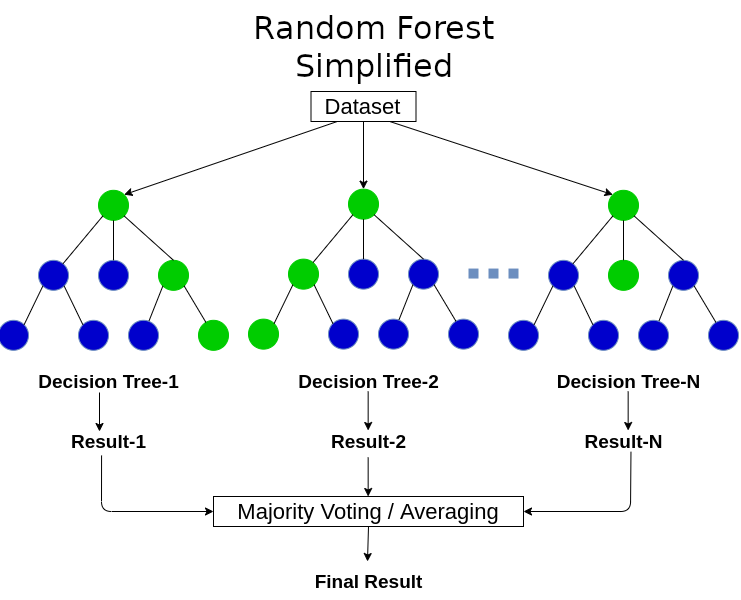

Another advantage of `RandomForestRegressor` over `XGBRegressor` lies in **interpretability**. Random Forest uses Decision Trees as its base model. **A Decision Tree makes predictions by following a series of simple, condition-based splits, which can be visualized and explained to non-technical stakeholders. Random Forest improves upon this by using an ensemble of multiple Decision Trees and aggregating their results (e.g., averaging for regression) while improving overall predictive performance**. Additionally, Random Forest's parameters are similar to those of Decision Trees, making it more intuitive for non-technical stakeholders who've been taught with the simpler Decision Tree beforehand. 

In contrast, while **`XGBRegressor`** is also a tree-based ensemble, it **employs a more complex Extreme Gradient Boosting method with sophisticated parameters. This complexity, combined with the need for careful tuning of multiple parameters such as learning rate, regularization, and subsampling, makes it considerably more challenging to explain to non-technical audiences.**


Interpretability is crucial in the real estate industry, where regulators and **stakeholders—such as real estate agents and property owners—** require confidence in how predictions are made. The lack of interpretability can pose **liability risks**, potentially leading to **disputes** or **financial losses**. This is especially **relevant in East Asian markets such as South Korea**, where the cultural emphasis on **face-saving** there **demands clear justification for critical business decisions**.


**Given these considerations, along with the points discussed in the previous section, `RandomForestRegressor` will be selected as the best-fit model in this work.**

# **9. Feature Impact Analysis**

In [46]:
import shap

In [47]:
X_test_transform = pipe_best_rf['preprocessing'].transform(X_test)
feature_names = pipe_best_rf['preprocessing'].get_feature_names_out()

In [48]:
feature_names

array(['ordinal__TimeToSubway', 'ordinal__HallwayType',
       'binary__SubwayStation_0', 'binary__SubwayStation_1',
       'binary__SubwayStation_2', 'binary__SubwayStation_3',
       'robust__N_FacilitiesNearBy(ETC)',
       'robust__N_FacilitiesNearBy(PublicOffice)',
       'robust__N_SchoolNearBy(University)',
       'robust__N_Parkinglot(Basement)', 'robust__YearBuilt',
       'robust__N_FacilitiesInApt', 'robust__Size(sqf)'], dtype=object)

In [49]:
feature_names = ['Time To Subway',
 'Hallway Type',
 'Subway Station 0',
 'Subway Station 1',
 'Subway Station 2',
 'Subway Station 3',
 '# of Facilities Nearby (ETC) ',
 '# of Facilities Nearby (Public Office) ',
 '# of School Nearby (University) ',
 '# of Parking lot (Basement) ',
 'Year Built',
 '# of Facilities In Apartment',
 'Size (sqf)']


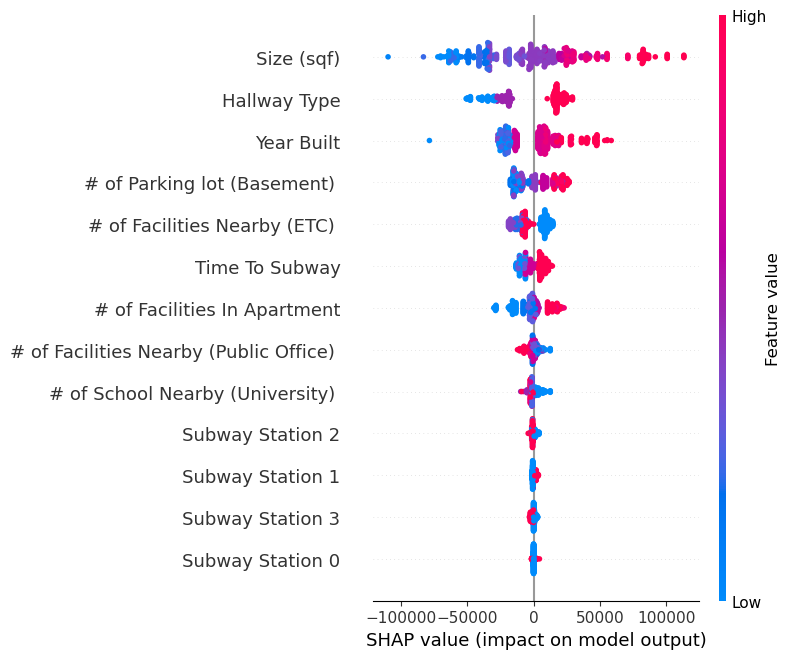

In [50]:
explainer = shap.TreeExplainer(pipe_best_rf['model'])
shap_values = explainer.shap_values(X_test_transform)

# Create the beeswarm plot
plt.figure(figsize=(10,30))
shap.summary_plot(shap_values, X_test_transform, feature_names=feature_names)

plt.show()

- **The top 3 most influential features are [Property Characteristics](#14-data-understanding) Features**

- **The SHAP values analysis reveals Size (sqf) as the most influential predictor of apartment prices, aligning with earlier correlation findings.**

- **Hallway Type, converted to an ordinal variable during preprocessing, emerges as the second strongest predictor.** 

- Other numeric variables maintain their expected positive/negative relationships but with smaller impact. 

- Subway Station features, encoded using binary encoding, demonstrate the least influence on price predictions.

# **11. Selected Model Limitations**


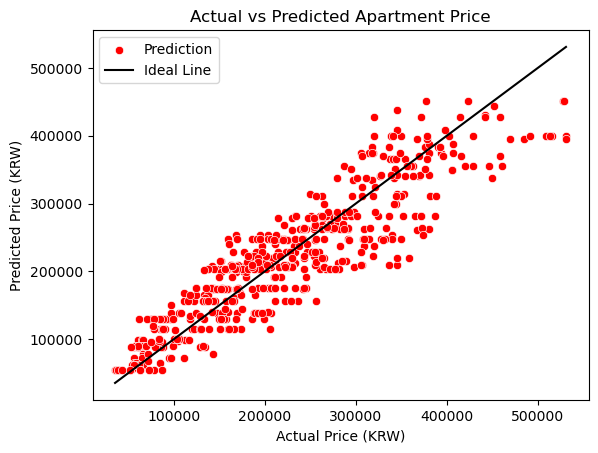

In [51]:
sns.scatterplot(x=y_test, y=y_pred_best_rf, color='red', label='Prediction')
plt.title("Actual vs Predicted Apartment Price")
plt.xlabel("Actual Price (KRW)")
plt.ylabel("Predicted Price (KRW)")

sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test),max(y_test)], color='black', label="Ideal Line")
plt.show()

- The model is **most accurate for apartments priced up to 300,000 Korean Won**. For higher-priced properties, the prediction error tends to increase.  

- The model is primarily limited to the ranges defined in the training dataset. It is at most **accurate for apartments less than 2300 square feet in size, as larger properties were removed during data cleaning**. 

- The geographical **scope of the model is restricted to apartments located in proximity to the subway stations included in the dataset**. This means that **predictions for properties in other areas of Daegu might not be as accurate or applicable**.

- The model may produce **less reliable predictions for apartments with feature combinations that are not well-represented in the training data**. For instance, mixed-type apartments constructed after 2006 are absent from the dataset, making predictions for such properties potentially less accurate.

- The model's predictions are inherently limited by the features available in the dataset. While the current features capture important aspects such as size, location, and building characteristics, there might be other significant factors affecting apartment prices that are not included in the data, such as floor level, geographic coordinates, or recent renovations.

- Lastly, while hyperparameter tuning has minimized `RandomForestRegressor`'s MAE, the optimization is confined to the specific parameter space that was explored during the tuning process. There might be better parameter combinations outside the tested range that could potentially improve the model's performance further.

# **11. Recommendations**

Considering the model's intended implementation in an online real estate platform as described in the beginning, the following recommendations are proposed:

1. **Ensure transparent communication of model limitations to users while maintaining trust. This could involve collaboration between marketing team and engineering team responsible for model deployment.**

2. **Develop and implement systematic user feedback mechanisms to assess user's satisfactions with the deployed model.**

3. **Allow affiliated agents in the platform to validate and refine the model's predictions. Use their expertise to improve the model' accuracy iteratively.**

4. **Implement a regular schedule for updating the model with the latest market data. This periodic refinement will help maintain competitive edge against other online real estate platforms and ensure the model remains relevant.**

# **12. Conclusions**

This work aimed to develop a machine learning model for predicting apartment prices in Daegu, South Korea, within the context of online real estate platforms. Three metrics (MAE, MAPE,  and RMSE) were considered, with MAE as the primary metric due to the right-skewed nature of apartment prices.

Data cleaning and EDA revealed an ordinal structure among apartment hallway types and significant correlations between numerical variables. Four models (Ridge, Decision Tree, Random Forest, and XGBoost) were evaluated, with Random Forest and XGBoost chosen among the four for sueprior performance. **After hyperparameter tuning, both Random Forest and XGBoost achieved similar MAE values (~35,000) and their MAPE scores (~18%) fall within the "Good Forecasting" range**.

**Random Forest was ultimately selected as the best-fit model due to its comparable performance to XGBoost and superior interpretability**. 

**SHAP analysis confirmed the correlations identified during EDA and highlighted the significant impact of the feature-engineered Hallway Type variable, second only to Apartment Size in influencing price predictions.**

**While the model demonstrates good predictive capabilities, it has limitations primarily related to price rangers, data scope, and feature representation. Recommendations for implementation in online real estate platforms include transparent communication of limitations, systematic user feedback collection, and regular model updates to maintain relevance and accuracy.**

In [52]:
import pickle

In [53]:
best_model_to_pickle = Pipeline([
    ('preprocessing', transformer),
    ('model', RandomForestRegressor(random_state=0, **rf_best_params))
])

best_model_to_pickle.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(cols=['TimeToSubway',
                                                                       'HallwayType'],
                                                                 mapping=[{'col': 'TimeToSubway',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': no_bus_stop_nearby    1
15min~20min           2
10min~15min           3
5min~10min            4
0-5min                5
dtype: int64},
                                                                          {'col': 'HallwayType',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': corrido...
                                                  ['SubwayStation']),
                                                 ('robust', RobustScaler(),
                                                  Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(criterion='absolute_error', max_depth=8,
                                       max_features=0.3333333333333333,
                                       n_estimators=200, random_state=0))])

In [54]:
## Save tuned Random Forest model
with open('best_model_rf.sav', 'wb') as file:
    pickle.dump(best_model_to_pickle, file)